## Pandas

<a target="_blank" href="https://colab.research.google.com/github/LuWidme/uk259/blob/main/demos/Pandas%20Intro.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>


Pandas is a Data Manipulaiton Library hat makes it easy to handle complex datasets.

Creating a DataFrame by passing a NumPy array, with labeled columns:

In [1]:
import pandas as pd
import numpy as np
#df=pd.read_csv("../datasets/melb_data.csv")
#df[df.isnull().any(axis=1)].iloc[-5:,14:17]

df = pd.DataFrame(np.random.randn(6, 4),  columns=list("ABCD"))

The columns of the resulting DataFrame have different dtypes.

If you’re using IPython, tab completion for column names (as well as public attributes) is automatically enabled. Here’s a subset of the attributes that will be completed:



In [2]:
df.dtypes

,0
A,float64
B,float64
C,float64
D,float64


## Viewing data
df.head()
df.tail(3)
df.describe()
df.sort_values(by="B")
df.sort_index(axis=1, ascending=False)

## Selecting Data

In [3]:
print(df["A"])

print(df.iloc[3:5, 0:2] )#selection by index

0    0.326159
1    0.491820
2   -0.049896
3   -0.661726
4    0.162067
5   -0.441038
Name: A, dtype: float64
          A         B
3 -0.661726  0.859151
4  0.162067 -0.321418


## Boolean indexing

In [4]:
print(df[df > 0])


          A         B         C         D
0  0.326159  0.031640       NaN  1.091541
1  0.491820  1.350271  1.213767       NaN
2       NaN  1.472215       NaN  1.513355
3       NaN  0.859151  1.571887       NaN
4  0.162067       NaN       NaN       NaN
5       NaN  1.578915  2.484517  1.244487


In [5]:
df.iloc[1,1] = "Hello"

df[df.isin(["Hello", "World"])]

<ipython-input-5-808061c0b145>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Hello' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.iloc[1,1] = "Hello"


,A,B,C,D
0,NaN,NaN,NaN,NaN
1,NaN,Hello,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN


## Task1: Missing data
In the following Dataframe, some data is missing. Find a way to:
* 1: Remove the column containing the missing data
* 2:  Fill the missing column with the average of each row

In [6]:
df1 = df.reindex( columns=list(df.columns) + ["E"])
df1

,A,B,C,D,E
0,0.326159,0.03164,-0.342885,1.091541,NaN
1,0.491820,Hello,1.213767,-1.405117,NaN
2,-0.049896,1.472215,-1.348339,1.513355,NaN
3,-0.661726,0.859151,1.571887,-0.820725,NaN
4,0.162067,-0.321418,-0.340682,-0.088233,NaN
5,-0.441038,1.578915,2.484517,1.244487,NaN


In [7]:
# prompt: remove the column containing the missing data and fill the missing column with the average of each row

import pandas as pd
import numpy as np

df = pd.DataFrame(np.random.randn(6, 4),  columns=list("ABCD"))
df1 = df.reindex( columns=list(df.columns) + ["E"])

# 1: Remove the column containing the missing data
df1 = df1.dropna(axis=1, how='any') #remove columns with any missing values

# 2: Fill the missing column with the average of each row
#First create a sample dataframe with a missing column 'E'
df1 = df.reindex(columns=list(df.columns)+['E'])
df1['E'] = np.nan  # introducing missing values in column E
#calculate the average of each row
row_means = df1.mean(axis=1)

#fill the missing values with row average.
df1['E'] = df1['E'].fillna(row_means)
df1


,A,B,C,D,E
0,2.069621,-0.014088,1.375037,0.217086,0.911914
1,1.031267,0.254091,-0.706608,0.306947,0.221424
2,0.668306,-0.552631,-0.087365,1.113663,0.285493
3,-1.295105,0.141740,0.886867,-0.009596,-0.069023
4,0.723838,-0.935700,-0.289642,0.007919,-0.123396
5,0.143984,0.418725,0.648197,0.275923,0.371707


# Task 2.1: Plotting

The variable *ts* below contains a randomly generated "time series" a dataset in which time is one of the axies.

* Calculate the **cumulative sum** of this series in a new series. The cumulative sum at index *i* is the sum of all entries in *ts* up until index *i*.
* Plot the cumulative sum using *matplotlib*

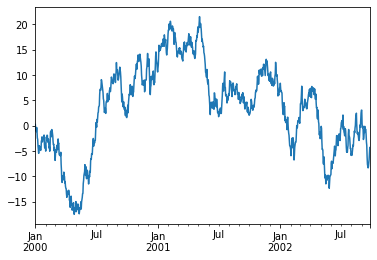

<Axes: >

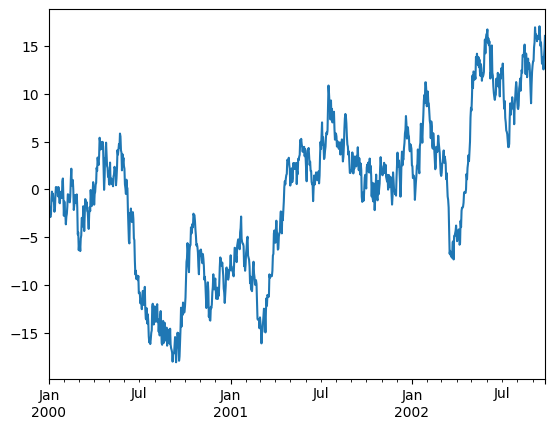

In [29]:
import matplotlib.pyplot as plt
ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000", periods=1000))
ts_cs = ts.cumsum()
ts_cs.plot()

# Task 2.2:  

Adapt the code above to plot 4 timeseries in the same plot, with A different colour and label for each timeseries.\
The output should look similar to this:


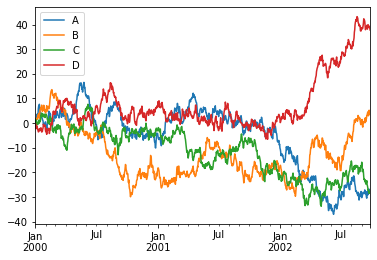

<Axes: >

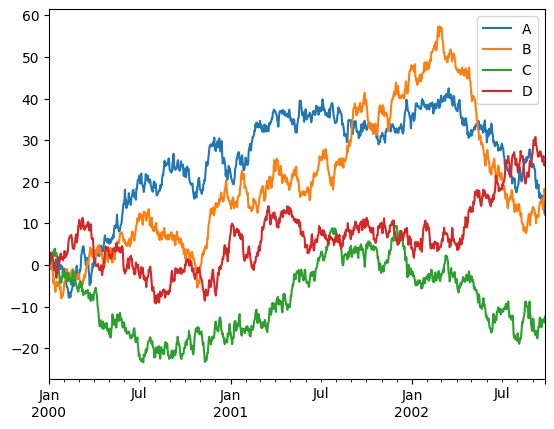

In [32]:
df = pd.DataFrame(
    np.random.randn(1000, 4), index=ts.index, columns=["A", "B", "C", "D"]
)

df_cs = df.cumsum()
df_cs.plot()